<a href="https://colab.research.google.com/github/Santiago-Quinteros/TP_Kernel_Methods/blob/main/kernel_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img
src="http://www.telecom-em.eu/sites/default/files/logoimt2016.JPG"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Kernel methods: solutions  </font></p>
<p><font size="3">
 QUINTEROS Santiago and PISTONE W. Sofia </font></p>
</p>
</CENTER>
----------------------------

## I - Kernel density estimation

> 1. Implement the kernel density estimator with a Gaussian kernel in a function **kde(x,data=data,h=0)** where $x$ represents the locations where the density estimator is computed, $data$ the data and $h$ the bandwidth. For default value $h=0$ the bandwidth should be changed inside the function to the standard Sylverman bandwidth estimator.
> 2. For $n=100$ samples of a $\mathcal{N}(1,1)$ distribution, plot the pdf and its estimator.
> 3. Check the influence of the value of the bandwidth parameter.
<!--Use bandwidth parameter suggested in (https://en.wikipedia.org/wiki/Kernel_density_estimation).-->

In [ ]:
from pylab import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Returns the estimated pdf in x

def kde(x,data,h=0):
  n=len(data)

  #Use standard Sylverman estimator
  if h==0:
    m_estimated=(1/n)*sum(data)
    sigma= np.sqrt(1/n*(sum((data-m_estimated)**2)))
    h=1.06*sigma*n**(-1/5)

  def kernel(u):
    return 1 / (np.sqrt(2 * np.pi) * h) * np.exp(-u ** 2/(2*h**2))

  K = kernel((x[:, np.newaxis]-data)/h)

  estimated_pdf=(1/(n*h))*sum(K,-1)

  return estimated_pdf

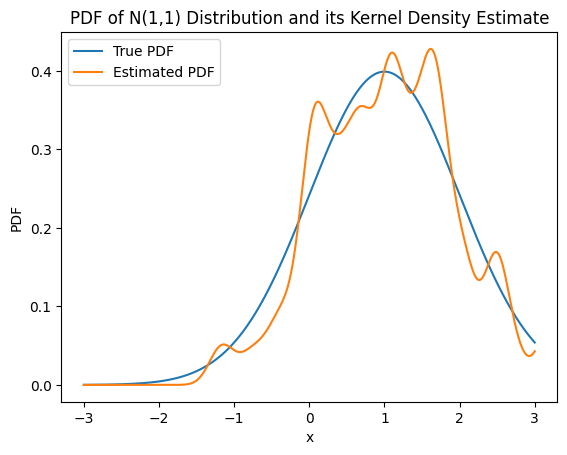

In [ ]:
#Test

n=100
data = np.random.normal(1, 1, n)
x_min = -3
x_max = 3
num_steps = 1000
x = np.linspace(x_min, x_max, num_steps)

estimated_pdf = kde(x, data, h=0)

# Define parameters
mean=1.0
std=1.0

#despues lo plotemos respecto a data
def real_pdf(x,mean,std):
  return 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * (x - mean) ** 2 / (std ** 2))

plt.plot(x, real_pdf(x, mean, std), label='True PDF')
plt.plot(x, estimated_pdf, label='Estimated PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of N(1,1) Distribution and its Kernel Density Estimate')
plt.legend()
plt.show()



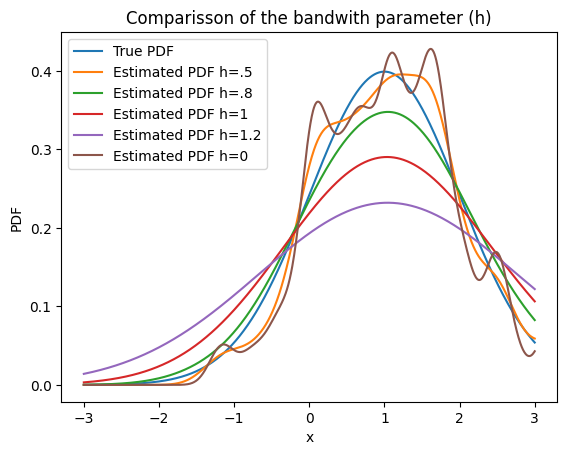

In [ ]:
#Test with a different h
estimated_pdf_05 = kde(x, data, .5)
estimated_pdf_08 = kde(x, data, .8)
estimated_pdf_1 = kde(x, data, 1)
estimated_pdf_12 = kde(x, data, 1.2)
estimated_pdf_0 = kde(x, data, 0)

plt.plot(x, real_pdf(x, mean, std), label='True PDF')
plt.plot(x, estimated_pdf_05, label='Estimated PDF h=.5')
plt.plot(x, estimated_pdf_08, label='Estimated PDF h=.8')
plt.plot(x, estimated_pdf_1, label='Estimated PDF h=1')
plt.plot(x, estimated_pdf_12, label='Estimated PDF h=1.2')
plt.plot(x, estimated_pdf_0, label='Estimated PDF h=0')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Comparisson of the bandwith parameter (h)')
plt.legend()
plt.show()


## II - Kernel regression

Assume a pair $(X,Y)$ of random variables, with $p(x)\sim\mathcal{U}_{[-3,3]}$ and $p(y\vert x)\sim\mathcal{N}(x^2+\exp(-x),10\cos^2x)$. Implement the kernel approximation of the regression curve $\mathbb{E}[Y\vert X=x]$ and of linear regression. Test your code with sample size $n=10^4$.

In [ ]:
from pylab import *
%matplotlib inline

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
#Returns the estimated pdf in x

def kde_with_y(x,data,Y_X,h=0):
  n=len(data)

  #Use standard Sylverman estimator
  if h==0:
    m_estimated=(1/n)*sum(data)
    sigma= np.sqrt(1/n*(sum((data-m_estimated)**2)))
    h=1.06*sigma*n**(-1/5)

  def kernel(u):
    return 1 / (np.sqrt(2 * np.pi) * h) * np.exp(-u ** 2/(2*h**2))

  K = kernel((x[:, np.newaxis]-data)/h)
  K=np.array(K)
  Y_X=np.array(Y_X)
  estimated_pdf=(1/(n*h))*sum(Y_X*K,-1)

  return estimated_pdf

<class 'numpy.ndarray'>


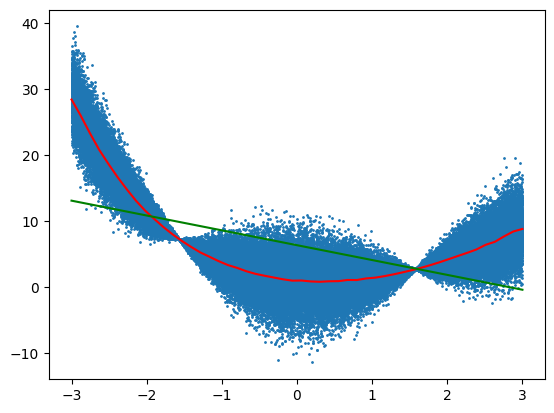

In [ ]:

#We want to estimate the average Y, knowing X and it's relation with Y

n = int(10e4)
X = np.random.uniform(low=-3, high=3, size=n)

#For every x I estimate an y
Y_X = np.zeros((n))
print(type(Y_X))
for i in range(n):
    Y_X[i] = np.random.normal(loc=X[i]**2+np.exp(-X[i]), scale=np.sqrt(10*(cos(X[i])**2)))

#----
#Kernel regression formula

#x is the real line
x = np.linspace(-3,3,50)

#X the data
#Y_X is the y estimated with X
kde_x = kde(x, X)
kde_yx = kde_with_y(x, X, Y_X)
E_y_x = np.divide(kde_yx, kde_x)

#y estimated using x and their relation
plt.scatter(X,Y_X, s=1)
plt.plot(x,E_y_x,'r') #Estimated E[Y|X=x]

#Linear regression
X=np.array(X)
Y_X=np.array(Y_X)
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y_X)
y_pred = model.predict(x.reshape(-1, 1))

plt.plot(x,y_pred,'g') #Linear regression

## III KNN

We consider 2D data generated using the code below. Each line of dataX and dataY represents points form a distinct class

    ns  = 200  # number of samples per class
    nc = 3    # number of classes
    dataX  = zeros(shape=(nc,ns))
    dataY  = zeros(shape=(nc,ns))
    dataX[0,:]  = randn(ns)
    dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
    dataX[1,:]  = -1 + .5*randn(ns)
    dataY[1,:]  =  1 + .5*randn(ns)
    dataX[2,:]  =  1 + .5*randn(ns)
    dataY[2,:]  = -1 + .5*randn(ns)

> 1. Visualize data and their class using a scatter plot.
> 2. Discretize the area $[-3,3]\times[-3,3]$ with 100 points per axis. For each point, compute the minimum surface $Z_{ij}=S(X_{ij},Y_{ij})$ of the disk that encloses the K nearest neighbors and represent a contour plot of $Z$
> 3. For each point of the surface, compute the posterior probabilities of the classes and plot the posterior probability map for each class.
> 4. Plot the decision map for the class that supplies the decided class for each point based on posterior probability maximization.


Note: you could alternatively use scikit learn (https://scikit-learn.org/stable/modules/neighbors.html)

In [ ]:
# 2D data - dataX and dataY represents points form a distinct class
ns  = 200  # number of samples per class
nc = 3    # number of classes
dataX  = zeros(shape=(nc,ns))
dataY  = zeros(shape=(nc,ns))
dataX[0,:]  = randn(ns)
dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
dataX[1,:]  = -1 + .5*randn(ns)
dataY[1,:]  =  1 + .5*randn(ns)
dataX[2,:]  =  1 + .5*randn(ns)
dataY[2,:]  = -1 + .5*randn(ns)

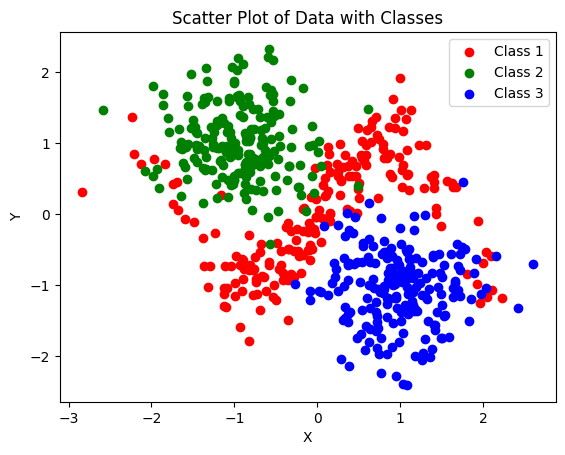

In [ ]:
colors = ['r', 'g', 'b']
for i in range(nc):
  plt.scatter(dataX[i, :], dataY[i, :], label='Class ' + str(i + 1), c= colors[i])

# for i in range(nc)[::dataX[i].shape[0]]:
#     labeled_data[i * dataX[i].shape[0]:i * dataX[i].shape[0] + dataX[0].shape[0]] = i
    # print(i)


class_labels = [1, 2, 3]
labeled_data = []
for i in range(nc):
    labeled_data.extend([class_labels[i]] * ns)
labeled_data = np.array(labeled_data)

# Plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data with Classes')
plt.legend()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5 # Number of nearest neighbors
Classifier = KNeighborsClassifier(k)

data_concat = np.concatenate((dataX.reshape(-1,1), dataY.reshape(-1,1)), axis=1)

Classifier.fit(data_concat, labeled_data)


KNeighborsClassifier()

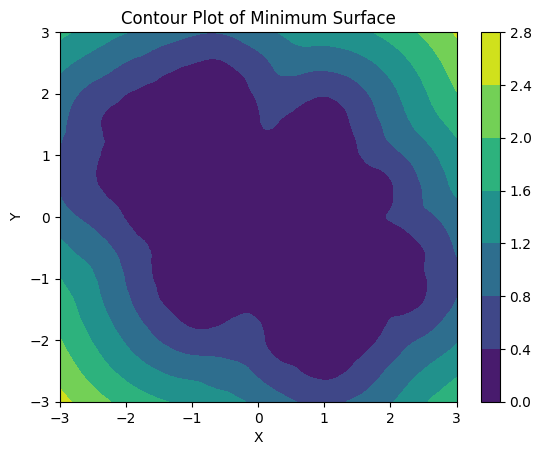

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Discretize the area
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
grid_size = 100
X, Y = np.meshgrid(x, y)
grid_points = np.c_[X.ravel(), Y.ravel()]

Z = np.zeros_like(X)

nbrs = NearestNeighbors(n_neighbors=k).fit(data_concat)
distances, _ = nbrs.kneighbors(grid_points)

Z = np.mean(distances, axis=1).reshape(X.shape)

plt.contourf(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Minimum Surface')
plt.colorbar()
plt.show()

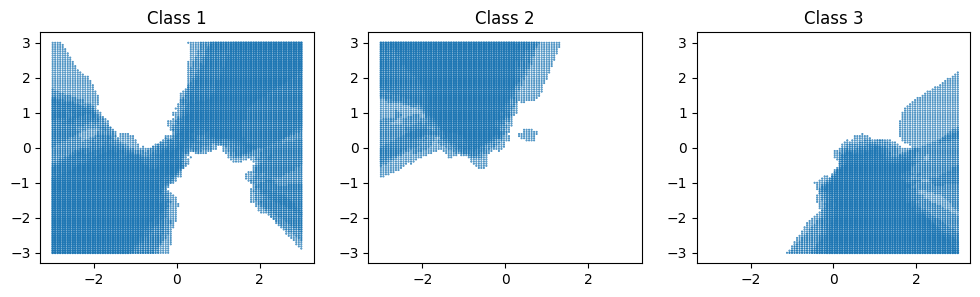

In [ ]:
Z = Classifier.predict_proba((np.c_[X.ravel(), Y.ravel()]))
Z = Z.reshape(grid_size, grid_size, nc)
fig, axs = plt.subplots(1,3,figsize=(12,3))
for i in range(nc):
    axs[i].scatter(X, Y, Z[:,:,i])
    axs[i].set_title("Class "+str(i+1))


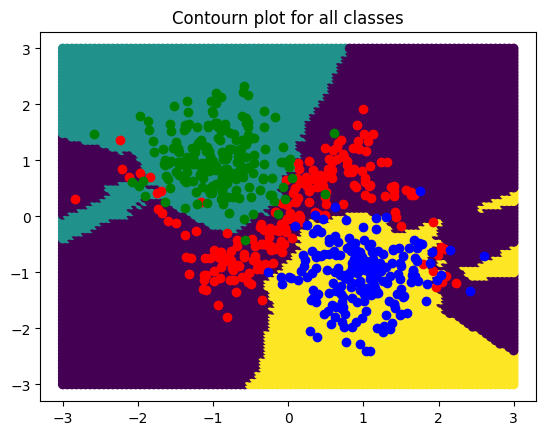

In [ ]:
Z = Classifier.predict((np.c_[X.ravel(), Y.ravel()]))
Z = Z.reshape(grid_size, grid_size)
plt.scatter(X, Y, c=Z)
for i in range(nc):
    plt.scatter(dataX[i,:], dataY[i,:], c=colors[i])
plt.title("Contourn plot for all classes")
plt.show()

## IV - Kernel methods with scikit-learn

We illustrate the use of scikit-learn for kernel density estimation by considering a simple example.

> 1. generate a set of data that contains $2.10^4$ samples with $\mathcal{N}(0,100)$ distribution, $10^4$ samples with $\mathcal{N}(3,1)$ distribution and $10^4$ samples with $\mathcal{N}(2,4)$ distribution.
> 2. Plot the kernel density estimator obtained using the **KernelDensity** function of scikit-learn.


Note: you could also use scikit learn for KNN (https://scikit-learn.org/stable/modules/neighbors.html)

In [ ]:
from pylab import *
%matplotlib inline

from sklearn.neighbors import KernelDensity
import scipy.stats as st

(1000,)
(1000, 1)
(1000,)


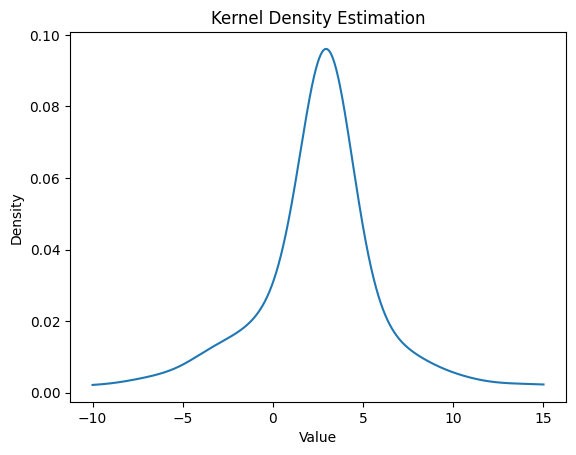

In [ ]:
# Define the 3 groups of data samples
samples1 = np.random.normal(0, 100, 20000)
samples2 = np.random.normal(3, 1, 10000)
samples3 = np.random.normal(2, 4, 10000)

data = np.concatenate((samples1, samples2, samples3))

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(data[:, np.newaxis])

x = np.linspace(-10, 15, 1000)
log_dens = kde.score_samples(x[:, np.newaxis])

# Plot
plt.plot(x, np.exp(log_dens))
plt.title('Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


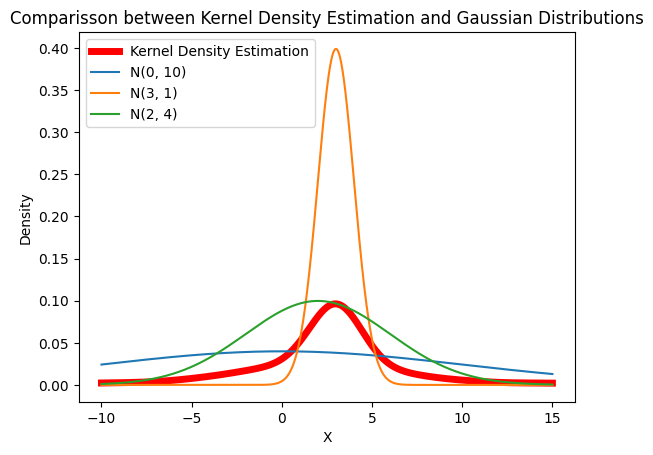

In [ ]:
pdf1 = (1 / (10 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 0) / 10) ** 2)
pdf2 = (1 / (1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 3) / 1) ** 2)
pdf3 = (1 / (4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 2) / 4) ** 2)

# Plot the kernel density estimation
plt.plot(x, np.exp(log_dens), label='Kernel Density Estimation', color='red', linewidth=5)

# Plot the PDFs of the three Gaussian distributions
plt.plot(x, pdf1, label='N(0, 10)')
plt.plot(x, pdf2, label='N(3, 1)')
plt.plot(x, pdf3, label='N(2, 4)')

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Comparisson between Kernel Density Estimation and Gaussian Distributions')
plt.legend()
plt.show()